# Hadnwritten digit recognition using CNN with Tensorflow

In [1]:
# Initial setup
import matplotlib
matplotlib.use('Agg')
from numpy import mean
from numpy import std
from matplotlib import pyplot
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# MNIST dataset used for this project:
from keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical  # Will be used to categorize an output layer neurons

# Import all required layers types
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout

# Load optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD



In [2]:
# Data load and preprocess

(Xtr_0, Ytr_0), (Xts_0, Yts_0) = mnist.load_data()

Xtr = Xtr_0.reshape((Xtr_0.shape[0], 28, 28, 1))  # Training input reshape matrix -> vector
Xts = Xts_0.reshape((Xts_0.shape[0], 28, 28, 1))  # Testing input reshape matrix -> vector
	
Ytr = to_categorical(Ytr_0) # Represent an output as a vecotr 1x10; exp: 4 -> [0 0 0 0 1 0 0 0 0 0]
Yts = to_categorical(Yts_0) # Same for test data

# Data normalization
Xtr_norm = Xtr.astype('float32')/255.0 
Xts_norm = Xts.astype('float32')/255.0 

In [3]:
# Definition of a function to build CNN architecture according to the paper (case 1)
def CNN_modelSetup(layers):
  CNN_model = Sequential()

  for l in layers:
    if(l == 'conv1'):
      CNN_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) #conv1
    if(l == 'conv2'):
      CNN_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')) #conv2
    if(l == 'pool'):
      CNN_model.add(MaxPooling2D((2, 2))) #pool1
    if(l == 'dropout1'):
      CNN_model.add(Dropout(0.25))
    if(l == 'flatten'):
      CNN_model.add(Flatten())
    if(l == 'dense1'):
      CNN_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    if(l == 'dropout2'):
      CNN_model.add(Dropout(0.5))
    if(l == 'dense2'):
      CNN_model.add(Dense(10, activation='softmax'))
	# compile model
  opt = Adam(learning_rate=0.005)
  # opt = SGD(learning_rate=0.01, momentum=0.9)
  CNN_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return CNN_model


In [4]:
case = [
        ['conv1', 'conv2', 'pool', 'dropout1', 'flatten1', 'dense1', 'dropout2', 'dense2'],
        ['conv1', 'pool', 'conv2', 'pool', 'dropout1', 'flatten', 'dense1', 'dropout2', 'dense2'],
        ['conv1', 'conv2', 'pool', 'flatten', 'dense1', 'dense2'],
        ['conv1', 'pool', 'conv2', 'pool', 'flatten', 'dense1', 'dense2'],
        ['conv1', 'conv2', 'pool', 'flatten', 'dense1', 'dropout1', 'dense2'],
        ['conv1', 'pool', 'conv2', 'pool', 'flatten', 'dense1', 'dropout1', 'dense2']
]

In [5]:
#Model training
CNN_mod = CNN_modelSetup(case[5])
CNN_mod.fit(Xtr_norm, Ytr, validation_data=(Xts_norm, Yts), epochs=15, batch_size=100, verbose=2)
scores = CNN_mod.evaluate(Xts_norm, Yts, verbose=0)
CNN_mod.save("CNN_HDR_case6.h5")

Epoch 1/15
600/600 - 27s - loss: 0.2185 - accuracy: 0.9373 - val_loss: 0.0537 - val_accuracy: 0.9832
Epoch 2/15
600/600 - 25s - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0381 - val_accuracy: 0.9884
Epoch 3/15
600/600 - 25s - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0344 - val_accuracy: 0.9888
Epoch 4/15
600/600 - 25s - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 5/15
600/600 - 25s - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0366 - val_accuracy: 0.9885
Epoch 6/15
600/600 - 25s - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0466 - val_accuracy: 0.9869
Epoch 7/15
600/600 - 25s - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0344 - val_accuracy: 0.9915
Epoch 8/15
600/600 - 26s - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 9/15
600/600 - 26s - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0365 - val_accuracy: 0.9908
Epoch 10/15
600/600 - 26s - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0427 - val_accura

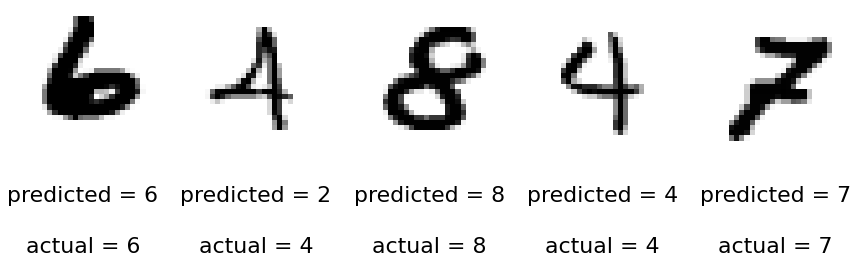

In [8]:
# Make prediction
CNN_mod.save("CNN_HDR_case6.h5")
predictions = CNN_mod.predict(Xts)
classes_x=np.argmax(predictions,axis=1)

# Compare predicted and actual classes
rndmind = np.random.choice(range(len(Xts)), 5)
fig = plt.figure(figsize=(15, 3))
for i, idx in enumerate(rndmind):
    img = Xts_0[idx] 
    ax = fig.add_subplot(1, 5, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'predicted = ' + str(classes_x[idx]), fontsize=22, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'actual = ' + str(Yts_0[idx]), fontsize=22, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='binary')

In [29]:
# GUI for digit recognition. Source: https://github.com/shafinhasnat/English-digit-recognition-GUI-with-tkinter
import tensorflow as tf
from keras.models import load_model
import cv2
import numpy as np
import os
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

from PIL import ImageTk, Image, ImageDraw
import PIL
import PIL.Image as Img
import tkinter as tk
from tkinter import *

classes=[0,1,2,3,4,5,6,7,8,9]
width = 800
height = 300
center = height//2
white = (255, 255, 255)
green = (0,128,0)

modelCNN=tf.keras.models.load_model('CNN_HDR_case6.h5') # Load our model

def paint(event):
    x1, y1 = (event.x - 10), (event.y - 10)
    x2, y2 = (event.x + 10), (event.y + 10)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=10)
    draw.line([x1, y1, x2, y2],fill="black",width=10)
    
def model():
    filename = "./image.png"
    image1.save(filename)
    nchar=segmentation(filename)
    txt.insert(tk.INSERT, "Prediction: ")
    for i in range(nchar):
        pred=testing(i+1)
        txt.insert(tk.INSERT,"{}".format(classes[pred[0]]))
    
def clear():
    cv.delete('all')
    draw.rectangle((0, 0, 5000, 5000), fill=(255, 255, 255, 0))
    txt.delete('1.0', END)
    import os
    filename = "./image.png"
    nchar=segmentation(filename)
    for i in range(nchar):
        os.remove('./char_' +str(i+1)+'.png')

def testing(charnum):
    img=cv2.imread('char_' +str(charnum)+'.png',0)
    img=cv2.bitwise_not(img)
    #cv2.imshow('img',img)
    img=cv2.resize(img,(28,28))
    img=img.reshape(1,28,28,1)
    img=img.astype('float32')
    img=img/255.0 
    pred=modelCNN.predict(img)
    classes_x=np.argmax(pred,axis=1)
    
    return classes_x

def segmentation(file):
    #file = "./image.png"
    img = cv2.imread(file)
    h, w, _ = img.shape
    boxes = pytesseract.image_to_boxes(img)
    charcoordintates=boxes.splitlines()
    nchar=len(charcoordintates)
    k=1;
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
        fp = open(file,"rb")
        imageObject = PIL.Image.open(fp)
        #imageObject = Image.open('image.png')
        cropped = imageObject.crop((int(b[1]), 
                                    h-int(b[4]),
                                    int(b[3]),
                                    h-int(b[2]),
                                   ))
        card = Img.new("RGBA", (300, 300), (255, 255, 255))

        img2 = cropped.convert("RGBA")
        x, y = img2.size
        ov=75
        card.paste(img2, (ov, ov, x+ov, y+ov), img2)
        card.save('char_' +str(k)+'.png', 'PNG')
        k=k+1
    return nchar
    
root = Tk()
##root.geometry('1000x500') 

root.resizable(0,0)
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

# PIL create an empty image and draw object to draw on
# memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

txt=tk.Text(root,bd=3,exportselection=0,bg='WHITE',font='Helvetica',
            padx=10,pady=10,height=5,width=20)

cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

##button=Button(text="save",command=save)
btnModel=Button(text="Predict",command=model)
btnClear=Button(text="clear",command=clear)
##button.pack()
btnModel.pack()
btnClear.pack()
txt.pack()
root.title('Digit recognition')
root.mainloop()